<div style="border:solid green 2px; padding: 20px">
<b>Привет, Олег!</b>

Меня зовут Александр, и я буду проверять твой проект. Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать data science. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**. Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самой найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Так выделены небольшие замечания. Я надеюсь, что их ты тоже учтешь - твой проект от этого станет только лучше. Но настаивать на их отработке не буду.

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.** Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

### Дополнительный инструментарий

In [1]:
# Песочница
#data0 = data.copy()
#data0.loc[[1745,4127]]

In [2]:
# Функция импорта из *.csv
def load_from_csv(source1, source2, path2='https://code.s3.yandex.net/datasets/', sep=','):
    """
        Функция организации загрузки данных в датафрейм из файла *.csv
        на входе:
            source1 - путь + файл *.csv на локальном компьютере
            source2 - файл *.csv
            path2 - путь (по умолчанию 'https://code.s3.yandex.net/datasets/')
            sep - разделитель (по умолчанию ',')
        на выходе:
            df (DataFrame)
    """
    try:
        df = pd.read_csv(source1, sep=sep)
    except ValueError:
        print('Fail - ValueError!')
    except Exception:
        print('Fail - загрузка из основного источника')
        print('Попытка загрузки из резервного источника')
        df = pd.read_csv(str(path2+source2), sep=sep)
        print(f'OK - загрузка из резервного источника: "{str(path2+source2)}"')
    else:
        print(f'OK - загрузка из основного источника: "{source1}"')
    finally:
        print('Конец.') 
    return df

#df = df.drop([''], axis=1)
#df.drop(index=index_list, inplace=True)
#df.to_csv('*.csv', index=False)

In [3]:
# функция вывода информации о столбце
def column_value_test(ds, test='un'):
    """
        Функция вывода информации о столбце
        'un' - unique(); 'na' - isna(); 'du' - duplicated()
    """
    if test == 'un':
        return print(f'Кол-во уникальных значений в столбце: "{ds.name}": {len(ds.unique())}/{len(ds)}')
    elif test == 'na':
        return print(f'Кол-во пропущенных значений в столбце: "{ds.name}": {ds.isna().sum()}/{len(ds)}')
    elif test == 'du':
        return print(f'Кол-во дубликатов в столбце: "{ds.name}": {ds.duplicated().sum()}/{len(ds)}')
    else:
        return print(f'Error!')
    
#column_value_test(data.iloc[:, 0])
#column_value_test(data.iloc[:, 0], test='na')
#column_value_test(data.iloc[:, 0], test='du')

In [4]:
# Функция преобразования типа
def change_type(ds, new_type='int8'):   
    """
        Фунция преобразования типа
        datetime - '%Y-%m-%dT%H:%M:%S'
        другие - 
    """      
    old_type = type(ds.values[0])
    if new_type == 'datetime':
        try:
            #ds = pd.to_datetime(ds, format='%Y-%m-%dT%H:%M:%S')
            ds = pd.to_datetime(ds, format='%Y-%m-%d')
            print(f'OK - {ds.name} {len(ds)} {type(ds.values[0])}')
        except:
            print(f'FAIL - {ds.name} {len(ds)} {type(ds.values[0])}')
    elif new_type == 'datetime64':
        try:
            ds = pd.to_datetime(ds, new_type)
            print(f'OK - {ds.name} {old_type} ({len(ds)}) --> {type(ds.values[0])}')
        except:
            print(f'FAIL - {ds.name} {len(ds)} {type(ds.values[0])}')            
    else:    
        try:
            ds = ds.astype(new_type)
            print(f'OK - "{ds.name}" {old_type} ({len(ds)}) --> {type(ds.values[0])}')
        except:
            print(f'FAIL - "{ds.name}" {len(ds)} {type(ds.values[0])}')     
    
    return ds

In [5]:
# Функция дополнительного функционала для pd.hist() 
def grafix(df_hist, x_label='', y_label='', title=''):
    for ax in df_hist.flatten():
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.set_title(title)
    
    plt.show()

In [6]:
def form_vert_head(df):
    """Показывает датафрейм с вертикальным заголовками"""
    # отбросить пропуски
    df = df.dropna('columns')
    # отделить строковые столбцы
#     df_o = df.select_dtypes(include=[object])
#     col_o = list(df_o)
    # оставить числовые столбцы
    df_n = df.select_dtypes(include=[np.number])
    # оставить столбцы с заданным количеством уникальных значений
    df_n = df_n[[col for col in df_n if df_n[col].nunique() > 1]]
    col_n = list(df_n)
    styles = [dict(selector="th", props=[('width', '40px')]),
              dict(selector="th.col_heading",
                   props=[("writing-mode", "vertical-rl"),
                          ('transform', 'rotateZ(180deg)'), 
                          ('height', '290px'),
                          ('vertical-align', 'top')])]
       
    return df_n.style.format('{:.1f}').set_table_styles(styles)

In [7]:
# Функция печати матрицы корреляций
def plot_correlation_matrix(df, graphWidth):
    #df = df.dropna('columns')
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'The number of non-NaN or constant columns({df.shape[1]}) is less than 2')
        return
    corr = df.corr(method='spearman')
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.suptitle(f'Матрица корреляций (упрощённо)', fontsize=18)
    plt.show()

In [8]:
# диаграмма и расчёт размаха
def box_calc_span(df, title=''):  
    l1 = []; l2 = []; l3 = []; l4 = []; l5 = []
    for col in df.columns:     
        # диаграмма размаха 
        df.boxplot(column=col, fontsize=12)
        plt.title(f'Диаграмма размаха: "{col}"', fontsize=20)
        plt.xlabel('', fontsize=14)
        plt.ylabel('Значения', fontsize=18)    
        plt.show()        
        
        # расчёт квантилей 
        q1 = round(np.quantile(df[col], 0.25), 1)
        q3 = round(np.quantile(df[col], 0.75), 1)
        delta_q3_q1 = round(q3-q1, 2)
        left_whisk = round(q1 - 1.5*delta_q3_q1, 1)
        if df[col].min() > left_whisk:
            left_whisk = df[col].min()
        right_whisk = round(q3 + 1.5*delta_q3_q1, 1)
        if df[col].max() < right_whisk:
            right_whisk = df[col].max()        
        l1.append(q1); l2.append(q3); l3.append(delta_q3_q1); l4.append(left_whisk); l5.append(right_whisk) 
        
    lst = [l1, l2, l3, l4, l5]
    df_subs = pd.DataFrame(lst, index=['q1', 'q3', 'delta_q3_q1', 'left_whisk', 'right_whisk'],
                           columns=df.columns)
    output = ""
    output = df_subs.style.format('{:.1f}').set_table_attributes("style='display:inline'")\
            .set_caption(f'{title}')._repr_html_()
    display(HTML(output))
    
    return df_subs

In [9]:
# Функция вывода группы гистограмм
def plot_hist(df, item_to_width=5):
    df = df.select_dtypes(include=[np.number])
    cols = df.columns
    if df.shape[1] < 5:
        df.hist(figsize=(10,10))
    else:
        item_to_height = math.ceil(len(cols)/item_to_width)
        k = item_to_height//item_to_width
        if k == 0:
            k = item_to_height/item_to_width
        fig = df.hist(figsize=(100,100*k), bins=30, layout=(item_to_height, item_to_width),
                      xlabelsize=50, ylabelsize=50)
        [x.title.set_size(50) for x in fig.ravel()]
    plt.show()

In [10]:
# Функция вывода группы диаграмм рассеяния и плотностей
def plot_scatter_matrix(df, plotSize, textSize):
    # отбросить пропуски
    df = df.dropna()
    # оставить числовые столбцы
    df = df.select_dtypes(include=[np.number])
    # оставить столбцы с заданным количеством уникальных значений
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    cN_len = len(columnNames)
    # вывод графиков постранично (10 на странице)
    for cnt in range(0, cN_len, 10):
        cN = columnNames[cnt:cnt+10]
        df_ = df[cN]
        ax = pd.plotting.scatter_matrix(df_, alpha=0.75, figsize=[plotSize, plotSize],
                                        diagonal='hist')
        # прописывание корреляции на графике
        corrs = df.corr().values
        for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
            ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2),
                              xycoords='axes fraction', ha='right', va='center', size=textSize)
        if cnt+10 <= len(columnNames):
            plt.suptitle(f'Диаграммы рассеяния и плотностей {cnt+10}/{len(columnNames)}',
                         fontsize=32)
        else:
             plt.suptitle(f'Диаграммы рассеяния и плотностей {len(columnNames)}/{len(columnNames)}',
                         fontsize=32)
        # отступ подзаголовков от заголовка
        # plt.subplots_adjust(top=0)
    plt.show()

In [11]:
import math

# Функция вывода группы круговых диаграмм
def plot_pie(df):    
    # выбор столбцов с количеством уникальных значений больше 1 и меньше 7
    cols = df[[col for col in df if ((df[col].nunique() > 1) & (df[col].nunique() < 10))]].columns
    # расположение count(cols)/3 x 3
    fig, axes = plt.subplots(math.ceil(len(cols)/3), 3, figsize=(12, 9))
    axes = axes.flat
    
    for i, col in enumerate(cols):
        values = df[col].value_counts()
        vpct = df[col].value_counts(normalize=True)
        first_small = len(values)
        sum = 0
        lst = []
        if ((vpct.min() < 0.03) & (vpct[:-1].min() < 0.03)):
            for k in range(len(values)):
                if vpct[k] < 0.03:
                    if first_small == len(values):
                        first_small = k
                    sum += values[k]
                    continue
                lst.append(k)

            values[first_small] = sum
            values = values[:first_small+1]
            lst = lst[:first_small]
            lst.append('Прочие')
            values = values.set_axis(lst)
        
        axes[i].pie(values, labels=values.index, autopct='%.0f%%', explode=[0.02]*values.size, radius=1,
                    #pctdistance=1.5,
                    #labeldistance=1.5,
                    textprops = dict(rotation_mode='anchor', va='center', ha='left', fontsize=8))      
        
        axes[i].set_title(col)
            
    axes[-1].axis('off')
    
    plt.suptitle('Круговые диаграммы', fontsize=16)
    plt.show()

In [12]:
def first_view(df, vertical=False, corr_matrix=True, pie=True, hist=True, h_item_to_width=5, scatter=False): 
    """
    функция для отображения общей информации о датафрейме
    
    """
    df.info();
    if vertical:
        display(form_vert_head(df.head(5)));
        display(df.iloc[:5,:2]);
        display(form_vert_head(df.describe()));
    else:
        display(df.head());
        display(df.describe().style.format('{:.1f}'));
    
    if corr_matrix:
        plot_correlation_matrix(df, 20)
    
    if vertical:
        display(form_vert_head(df.corr(method='spearman')) \
                               .background_gradient('coolwarm'));
    else:
        display(df.corr(method='spearman').style.format('{:.2f}') \
                .background_gradient('coolwarm')); 
    if pie:
        plot_pie(df)  
    if hist:
        plot_hist(df, h_item_to_width)
    if scatter:
        plot_scatter_matrix(df, 30, 15)

In [13]:
# Вывод датафреймов параллельно
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.format('{:.2f}').set_table_attributes("style='display:inline'")\
            .set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

In [14]:
# Функция определения характера корреляции (обобщённо для pe, sp, ke) по её числовым параметрам
def corr_analizer(row, name):
    """
        Функция оценивает числовое значение и преобразует в словесную форму
        Оценка универсальна для методов ("пирсон", "спирмен", "кендалл")
    """    
    n_sign = ['нулевая', 'отрицат.', 'положит.']
    r_ch = ['отсутствует', 'оч.слабая', 'слабая', 'средняя', 'высокая', 'оч.высокая']
    r_ch_id = [0.1, 0.3, 0.5, 0.7, 0.9] # по шкале Чеддока
    
    value = row[name]
    if value == 0:
        row['-/+'] = 'нулевая'
    elif value > 0:
        row['-/+'] = 'положит.'
    elif value < 0:
        row['-/+'] = 'отрицат.'
    else:
        row['-/+'] = 'Ошибка в знаке!'
    
    if (abs(value) >= 0.0) & (abs(value) < 0.1):
        row['r'] = 'отсутствует'    
    elif (abs(value) >= 0.1) & (abs(value) < 0.3):
        row['r'] = 'оч.слабая'
    elif (abs(value) >= 0.3) & (abs(value) < 0.5):
        row['r'] = 'слабая'
    elif (abs(value) >= 0.5) & (abs(value) < 0.7):
        row['r'] = 'средняя'
    elif (abs(value) >= 0.7) & (abs(value) < 0.9):
        row['r'] = 'сильная'
    elif (abs(value) >= 0.9) & (abs(value) <= 1.0):
        row['r'] = 'оч.сильная'
    else:
        row['-/+'] = 'Ошибка в величине!'
        
    return row[['-/+', 'r']]

# Функция формирования отчёта корреляции
def corr_former(df, first, other, method_corr='pearson'):
    """
        Функция формирует табличный вид результатов работы методов корелляции
    """    
    corr_list = []
    for item in other:
        corr = round(df[first].corr(df[item], method=method_corr), 2)
        corr_list.append(corr)
    method_short = method_corr[:2]
    df_c = pd.DataFrame(columns=[method_short, first, '|', '-/+', 'Связь'])
    df_c[first] = corr_list
    df_c[method_short] = '|'
    df_c['|'] = '|'
    df_c[['-/+', 'Связь']] = df_c.apply(lambda x: corr_analizer(x, first), axis=1)
    df_c = df_c.rename(index=lambda x: other[x])

    display(df_c) 

In [15]:
# Функция разделеления данных на выборки: тренировочную, валидационную, тестовую
def split_stratified_into_train_val_test(df_input, stratify_colname='y',
                                         frac_train=0.6, frac_valid=0.2, frac_test=0.2,
                                         random_state=12345, prnt=True):
    '''
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_valid : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    X_train, X_val, X_test, y_train, y_valid, y_test:
        Dataframes containing the six splits.
    '''

    if frac_train + frac_valid + frac_test != 1.0:
        raise ValueError('fractions %f, %f, %f do not add up to 1.0' % \
                         (frac_train, frac_valid, frac_test))

    if stratify_colname not in df_input.columns:
        raise ValueError('%s is not a column in the dataframe' % (stratify_colname))

    # Contains dataframe without stratify column
    X = df_input.drop([stratify_colname], axis=1)
    
    # Dataframe of just the column on which to stratify
    y = df_input[[stratify_colname]]

    if frac_test > 0:
        # Split X and y into train and temp.
        X_train, X_temp, y_train, y_temp = train_test_split(X,
                                                            y,
                                                            stratify=y,
                                                            test_size=(1.0 - frac_train),
                                                            random_state=random_state)

        # Split the temp X and y into val and test.
        relative_frac_test = frac_test / (frac_valid + frac_test)
        X_valid, X_test, y_valid, y_test = train_test_split(X_temp,
                                                            y_temp,
                                                            stratify=y_temp,
                                                            test_size=relative_frac_test,
                                                            random_state=random_state)
    else:
        X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                              y,
                                                              #stratify=y,
                                                              test_size=(1.0 - frac_train),
                                                              random_state=random_state)
        X_test = {}
        y_test = {}

    assert len(df_input) == len(X_train) + len(X_valid) + len(X_test)
    assert len(df_input) == len(y_train) + len(y_valid) + len(y_test)
    
    if prnt:
        print('dataframe:      ', df_input.shape)
        print('features_train: ', X_train.shape)
        print('features_valid: ', X_valid.shape)
        if frac_test > 0:
            print('features_test:  ', X_test.shape)
        print('target_train:   ', y_train.shape)
        print('target_valid:   ', y_valid.shape)
        if frac_test > 0:
            print('target_test:    ', y_test.shape)
        
    if frac_test > 0:
        return X_train.squeeze(), X_valid.squeeze(), X_test.squeeze(),\
               y_train.squeeze(), y_valid.squeeze(), y_test.squeeze()
    elif frac_test == 0:
        return X_train.squeeze(), X_valid.squeeze(), y_train.squeeze(), y_valid.squeeze()
    else:
        return "Error!"

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Шикарный набор функций:)</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Дополнительный-инструментарий" data-toc-modified-id="Дополнительный-инструментарий-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Дополнительный инструментарий</a></span></li><li><span><a href="#Задание" data-toc-modified-id="Задание-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Задание</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Математическое-обоснование-работы-алгоритма-преобразования-данных" data-toc-modified-id="Математическое-обоснование-работы-алгоритма-преобразования-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Математическое обоснование работы алгоритма преобразования данных</a></span><ul class="toc-item"><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li></ul></li><li><span><a href="#Практическая-проверка-алгоритма" data-toc-modified-id="Практическая-проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Практическая проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Качество-работы-моделей-с-исходными-и-преобразованными-персональными-данными" data-toc-modified-id="Качество-работы-моделей-с-исходными-и-преобразованными-персональными-данными-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Качество работы моделей с исходными и преобразованными персональными данными</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#ПРИЛОЖЕНИЕ" data-toc-modified-id="ПРИЛОЖЕНИЕ-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span><strong>ПРИЛОЖЕНИЕ</strong></a></span><ul class="toc-item"><li><span><a href="#Краткое-описание:" data-toc-modified-id="Краткое-описание:-4.0.1.1"><span class="toc-item-num">4.0.1.1&nbsp;&nbsp;</span><strong>Краткое описание:</strong></a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

### Задание

# Разработать метод преобразования данных для защиты персональной информации

Описание проекта

Нужно защитить данные клиентов страховой компании. Для этого необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. После этого обосновать корректность его работы. Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.
Описание данных

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи. Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Инструкция по выполнению проекта

    Загрузите и изучите данные.
    Ответьте на вопрос и обоснуйте решение. 
     Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
     a. Изменится. Приведите примеры матриц.
     b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
    Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
    Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

**Объект исследования** — данные клиентов страховой компании

**Цель исследования** — разработать такой метод преобразования данных, чтобы, в результате преобразования, третьим лицам было сложно восстановить персональную информацию клиента

**План исследования:** 

    I. Вводные данные 
    II. Подготовка дополнительного инструментария
    III. Загрузка и обзор данных из файла *.csv
    1. Подготовка данных
    2. Математическое обоснование работы алгоритма преобразования данных 
    2.1. Умножение матриц
    2.2. Алгоритм преобразования
    3. Практическая проверка алгоритма    
    IV. Общий вывод

## Подготовка данных

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
# настройки отображения данных
#matplotlib.rcParams.update({'font.size': 12})
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [18]:
# ГЛОБАЛЬНЫЕ ПЕРЕМЕННЫЕ

# режим прогона тетрадки "релиз"
RELEASE_GLOBAL = True

# режим авто
AUTO_GLOBAL = True

# генератор случайных чисел с ожидаемым числом
#STATE_GLOBAL = RandomState(12345)

In [19]:
# вывод предупреждений
import warnings
if RELEASE_GLOBAL:
    warnings.filterwarnings(action='ignore')

In [20]:
# Загрузка данных
df1 = load_from_csv(source1='./datasets/insurance.csv', source2='insurance.csv', sep=',')

OK - загрузка из основного источника: "./datasets/insurance.csv"
Конец.


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Огонь, данные на месте:)</div>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.0,5000.0,5000.0,5000.0,5000.0
mean,0.5,31.0,39916.4,1.2,0.1
std,0.5,8.4,9900.1,1.1,0.5
min,0.0,18.0,5300.0,0.0,0.0
25%,0.0,24.0,33300.0,0.0,0.0
50%,0.0,30.0,40200.0,1.0,0.0
75%,1.0,37.0,46600.0,2.0,0.0
max,1.0,65.0,79000.0,6.0,5.0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.00,0.00,0.01,-0.01,-0.00
Возраст,0.00,1.00,-0.02,-0.00,0.55
Зарплата,0.01,-0.02,1.00,-0.03,-0.01
Члены семьи,-0.01,-0.00,-0.03,1.00,-0.03
Страховые выплаты,-0.00,0.55,-0.01,-0.03,1.00


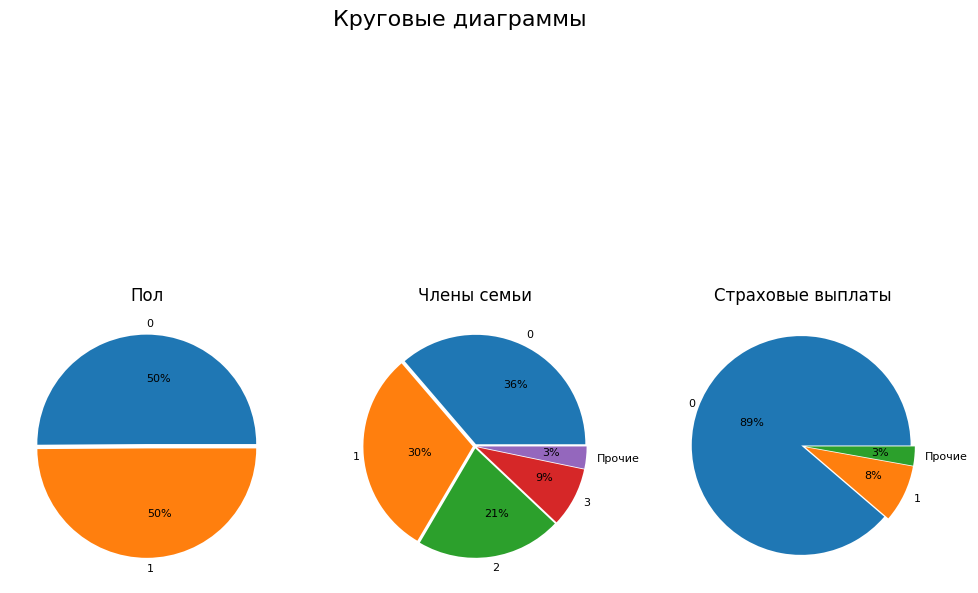

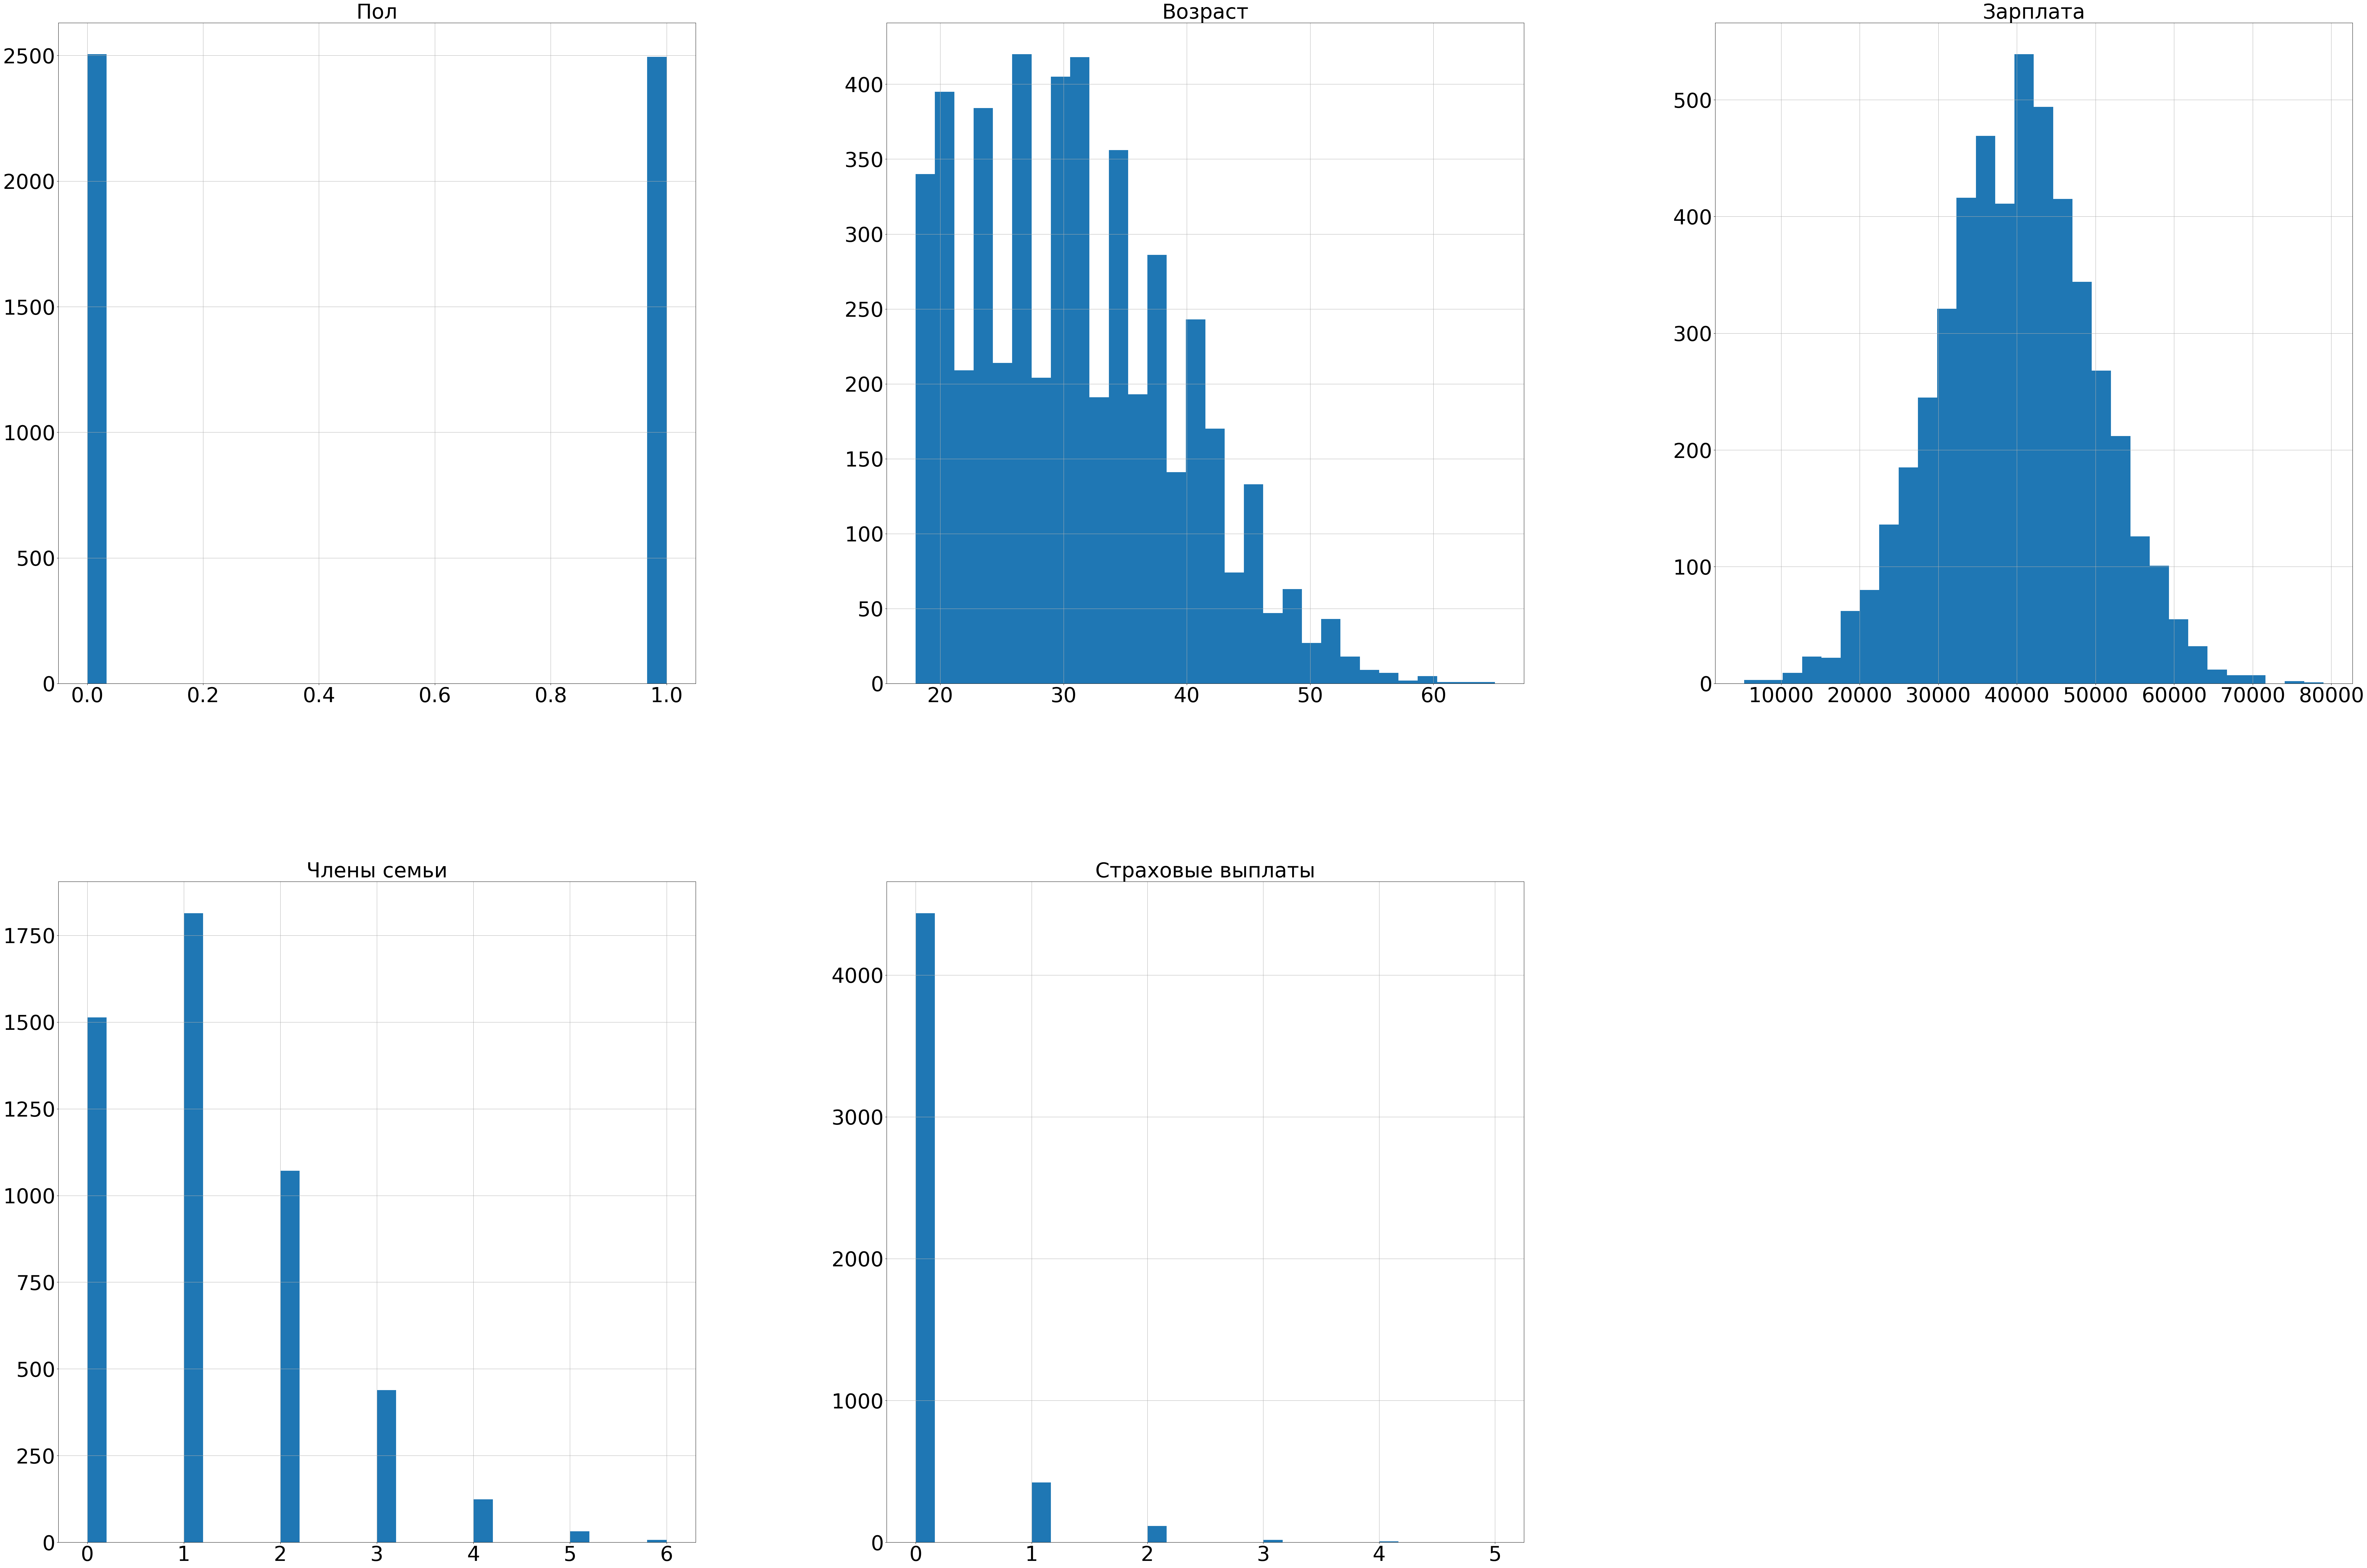

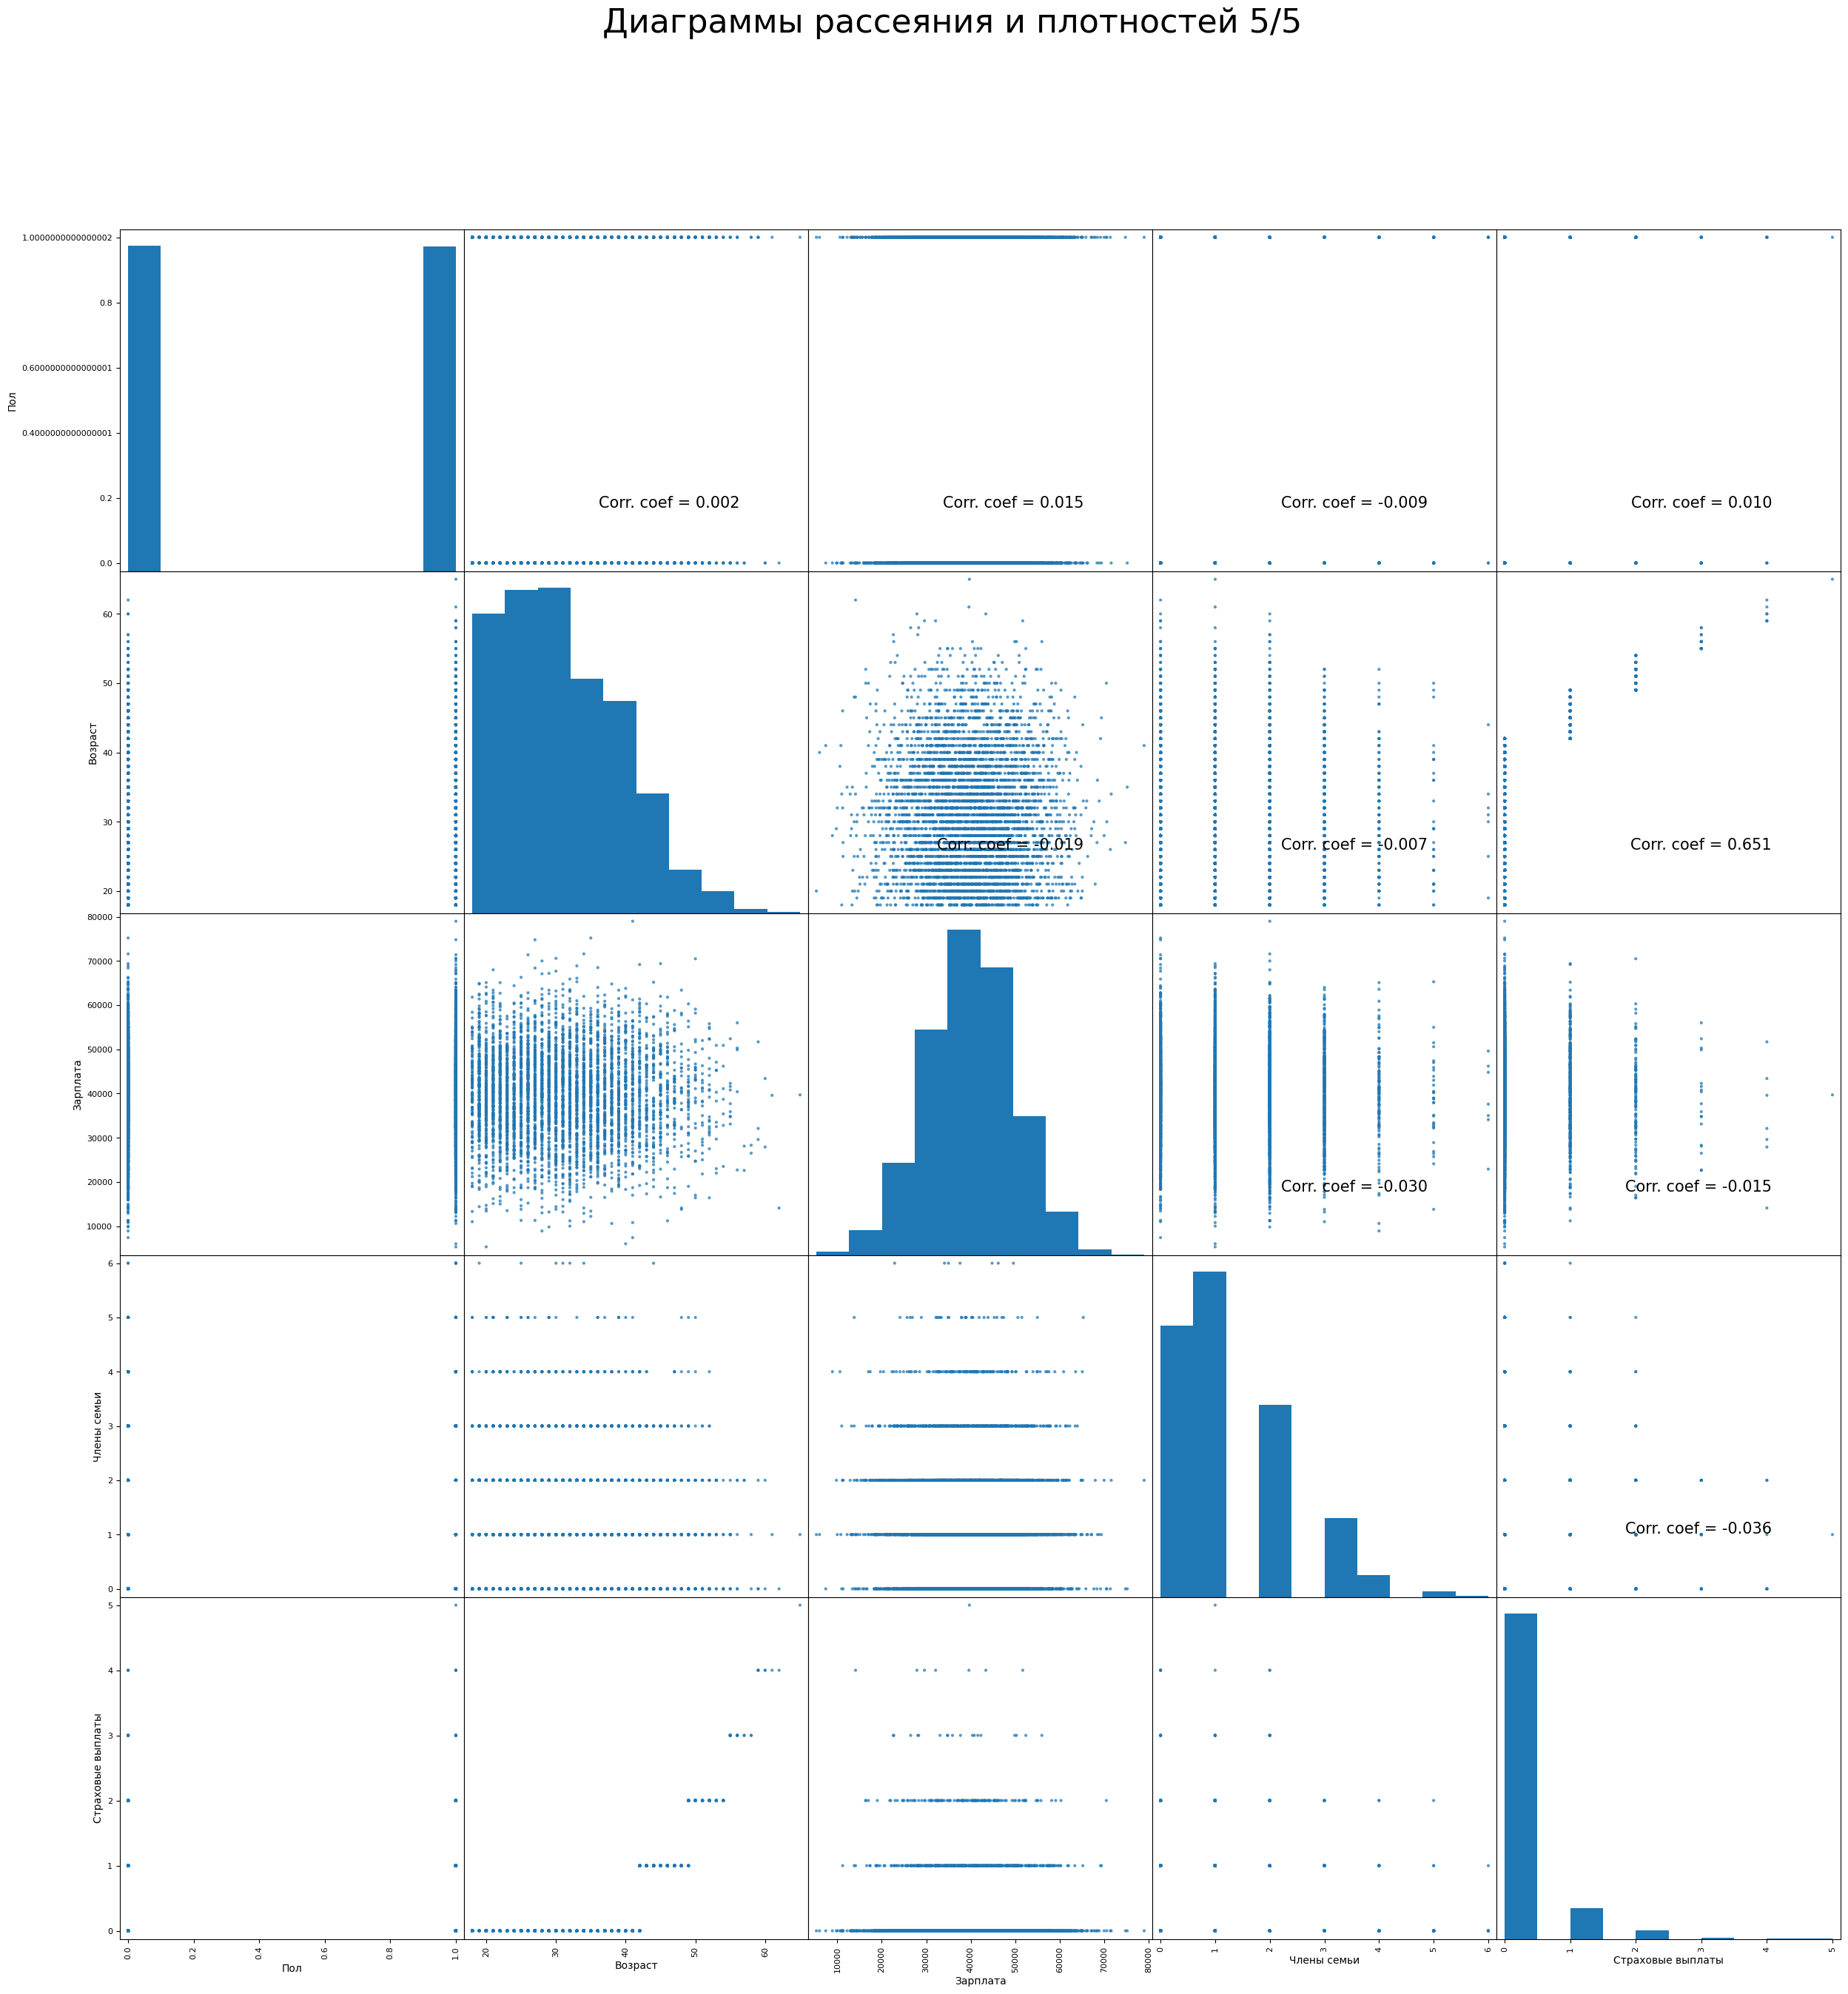

In [21]:
if RELEASE_GLOBAL:
    first_view(df1, corr_matrix=False, pie=True, hist=True, h_item_to_width=3, scatter=True)

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо, только обрати внимание, что надписи наехали друг на друга на крговой диаграмме</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Подправил.</div>

Наблюдения:
- признак "Пол" - полный паритет двух классов
- признак "Зарплата" - интервыльный - нормальное симметричное распределение
- признак "Возраст" - ближе к интервальному - нормальное распределение со смещением вправо
- признаки "Пол", "Члены семьи", "Страховые выплаты" - категориальные

In [22]:
# Общие ("огрублённые") корреляции Спирмена (для ранговых переменных x, y)
corr_former(df1, 'Возраст', df1.columns, method_corr='spearman')
corr_former(df1, 'Зарплата', df1.columns, method_corr='spearman')

,sp,Возраст,|,-/+,Связь
Пол,|,0.00,|,нулевая,отсутствует
Возраст,|,1.00,|,положит.,оч.сильная
Зарплата,|,-0.02,|,отрицат.,отсутствует
Члены семьи,|,-0.00,|,нулевая,отсутствует
Страховые выплаты,|,0.55,|,положит.,средняя


,sp,Зарплата,|,-/+,Связь
Пол,|,0.01,|,положит.,отсутствует
Возраст,|,-0.02,|,отрицат.,отсутствует
Зарплата,|,1.00,|,положит.,оч.сильная
Члены семьи,|,-0.03,|,отрицат.,отсутствует
Страховые выплаты,|,-0.01,|,отрицат.,отсутствует


Наблюдения:

- есть средняя положительная корреляция между возрастом и страховыми выплатами

### Предобработка данных

In [23]:
# дубликаты cтрок
df1.duplicated().sum()

153

In [24]:
# удаление дубликатов строк
df1 = df1.drop_duplicates()
df1.duplicated().sum()

0

In [25]:
# уникальные значения и пропуски в столбцах
for col in df1.columns:
    print(f'== Столбец "{col}" ==')
    column_value_test(df1[col], test='un')
    column_value_test(df1[col], test='na')
    #column_value_test(df1[col], test='du')
    print()

== Столбец "Пол" ==
Кол-во уникальных значений в столбце: "Пол": 2/4847
Кол-во пропущенных значений в столбце: "Пол": 0/4847

== Столбец "Возраст" ==
Кол-во уникальных значений в столбце: "Возраст": 46/4847
Кол-во пропущенных значений в столбце: "Возраст": 0/4847

== Столбец "Зарплата" ==
Кол-во уникальных значений в столбце: "Зарплата": 524/4847
Кол-во пропущенных значений в столбце: "Зарплата": 0/4847

== Столбец "Члены семьи" ==
Кол-во уникальных значений в столбце: "Члены семьи": 7/4847
Кол-во пропущенных значений в столбце: "Члены семьи": 0/4847

== Столбец "Страховые выплаты" ==
Кол-во уникальных значений в столбце: "Страховые выплаты": 6/4847
Кол-во пропущенных значений в столбце: "Страховые выплаты": 0/4847



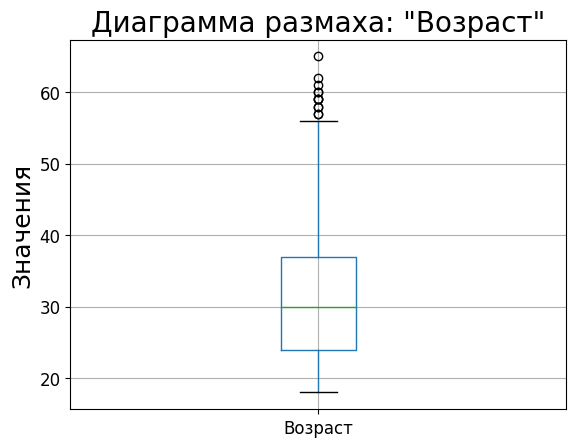

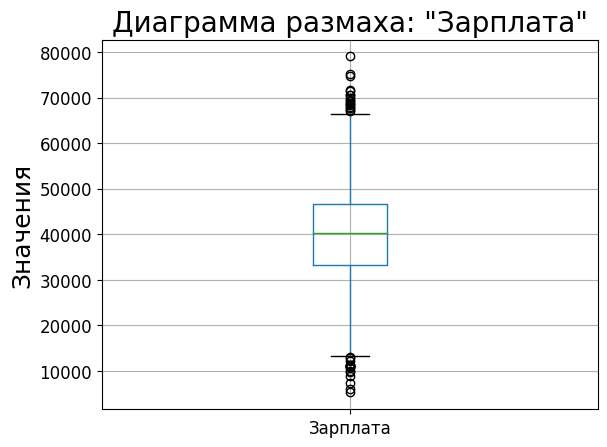

,Возраст,Зарплата
q1,24.0,33200.0
q3,37.0,46600.0
delta_q3_q1,13.0,13400.0
left_whisk,18.0,13100.0
right_whisk,56.5,66700.0


In [26]:
# диаграммы размаха и таблица 
df_subs = box_calc_span(df1[['Возраст', 'Зарплата']], title='Распределение данных')

Наблюдения:
- выбросы у признаков "Возраст" и "Зарплата" имеют естественный характер

In [27]:
# преобразования float64-->int8
for col in ['Пол', 'Возраст', 'Члены семьи', 'Страховые выплаты']:
    df1[col] = change_type(df1[col])
    
# преобразование float64-->int32
df1['Зарплата'] = change_type(df1['Зарплата'], 'int32')

OK - "Пол" <class 'numpy.int64'> (4847) --> <class 'numpy.int8'>
OK - "Возраст" <class 'numpy.float64'> (4847) --> <class 'numpy.int8'>
OK - "Члены семьи" <class 'numpy.int64'> (4847) --> <class 'numpy.int8'>
OK - "Страховые выплаты" <class 'numpy.int64'> (4847) --> <class 'numpy.int8'>
OK - "Зарплата" <class 'numpy.float64'> (4847) --> <class 'numpy.int32'>


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int8 
 1   Возраст            4847 non-null   int8 
 2   Зарплата           4847 non-null   int32
 3   Члены семьи        4847 non-null   int8 
 4   Страховые выплаты  4847 non-null   int8 
dtypes: int32(1), int8(4)
memory usage: 75.7 KB


In [29]:
df1.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41,49600,1,0
1,0,46,38000,1,1
2,0,29,21000,0,0
3,0,21,41700,2,0
4,1,28,26100,0,0


### Вывод

Краткое описание:

- файл данных:
    - 'https://code.s3.yandex.net/datasets/insurance.csv'
- в качестве разделителя в csv файле применён знак табуляции (',')

- размерность датафрейма:
    - 5 столбцов на 5000 строк

Типы данных признаков:

    - "Пол"               — int64   --> int8
    - "Возраст"           — float64 --> int8
    - "Зарплата"          — float64 --> int32
    - "Члены семьи"       — int64   --> int8
    - "Страховые выплаты" — int64   --> int8

Уникальные значения признаков:

    - "Пол"               — 2/4847   - категориальная переменная
    - "Возраст"           — 46/4847  - близко к нормальному распределению со смещением вправо
    - "Зарплата"          — 524/4847 - нормальное распределение интервальной переменной
    - "Члены семьи"       — 7/4847   - категориальная переменная
    - "Страховые выплаты" — 6/4847   - категориальная переменная
  
**Предобработка данных:**

Пропуски:
- отсутствуют

Дубликаты строк:
- 153 (удалены)

Наблюдения:

- есть средняя положительная корреляция между возрастом и страховыми выплатами
- выбросы у признаков имеют естественный характер

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хорошо</div>

## Математическое обоснование работы алгоритма преобразования данных

### Умножение матриц

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Это правила  языка вёрстки *LaTeX.* 

**Рабочие формулы:**

Предсказания:

$$
a = X·w
$$

Задачи обучения:

$$
w = \arg\min_w MSE(X·w, y)
$$

Обучения:

$$
w = (X^T·X)^{-1}·X^T·y
$$

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор значений целевого признака для обучающий выборки

- $P$ — обратимая матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $arg min()$ - находит минимум функции и возвращает аргумент, при котором он был достигнут

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** не изменится

Для обоснования ответа дополнительно приведём 6 свойства матриц:

1. $A·B \neq B·A$

2. $(A·B)^{T}=B^{T}·A^{T}$

3) $(A·B)^{-1}=B^{-1}·A^{-1}$

4) $A·A^{-1}=A^{-1}·A=E$

5) $A·E=E·A=A$

6. $A·(B·C) = (A·B)·C$

Обозначения:

- $A,B$ — квадратные матрицы одинаковой размерности

- $^{T}$ — знак транспонирования

- $А^{-1}$ — матрица обратная матрице А

- $E$ — единичная матрица (единицы только на главной диагонали)

В формуле предсказания $a = X·w$ признак Х умножим на обратимую матрицу Р: 

$$
a_1=X·P·w_1
$$

В формуле обучения тажке умножим X на P:
$$
w_1 = ((X·P)^{T}·X·P)^{-1}·(X·P)^{T}·y
$$

Подставим данные $w_1$ из формулы обучения в формулу предсказания:

$$
    a_1=X·P·((X·P)^{T}·X·P)^{-1}·(X·P)^{T}·y
$$

Раскроем скобки:

$$
    a_1=X·P·((P^{T}·X^{T}·X·P)^{-1}·P^{T}·X^{T}·y
$$

Вынесем за скобки $P^{Т}$:

$$
a_1 = X·P·(X^{T}·X·P)^{-1}·(P^{T})^{-1}·P^{T}·X^{T}·y
$$

Вынесем за скобки Р:

$$
a_1 = X·P·P^{-1}·(X^{T}·X)^{-1}·(P^{T})^{-1}·P^{T}·X^{T}·y
$$

Матрица Р умноженная на обратную матрицу $Р^{-1}$ даёт единичную матрицу E, так же $Р^{Т}$ на $(Р^{Т})^{-1}$ тоже даёт единичную матрицу Е. Т.к. при умножении матрицы на единичную, получается та же матрица, сократим единичные матрицы.

В результате после сокращений:
$$
a_1 = X·(X^{T}·X)^{-1}·X^{T}·y
$$

Т.к. $$w = (X^T·X)^{-1}·X^T·y$$

Получаем:
$$
a_1=X·w = a
$$

Доказано, что а = а1, а значит предсказания модели не будут изменены при умножении на обратимую матрицу.

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> 
    
Некорректно раскрыл: $(XP)^T \neq X^T P^T$  и   $((XP)^TXP)^{-1} \neq (X^TP^TXP)^{-1}$
    
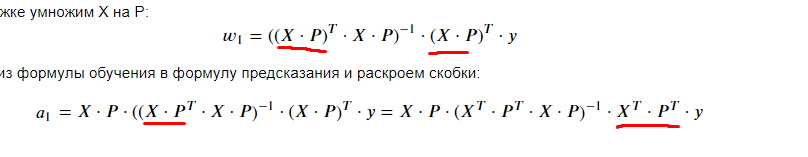
    
-------------------------------------------

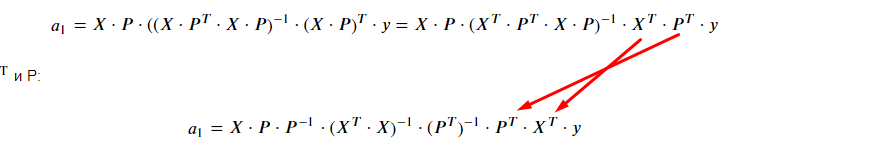
    
Матрицы переставлять местами нельзя: $AB \neq BA$, так как будет совсем другое значение уже. Тут более подробно
    
+  http://www.mathprofi.ru/deistviya_s_matricami.html
    
-------------------------------------------
    
 
     
    
+  У нас есть ряд свойств:
    $$
(AB)^T=B^T A^T \tag 1
$$
$$
(AB)^{-1} = B^{-1} A^{-1} \tag 2
$$
$$
A A^{-1} = A^{-1} A = E \tag 3
$$
$$
AE = EA = A \tag 4
$$
$$
A(BC) = (AB)C \tag 5
$$
  
Воспользуемся первым свойством:    
+  Для начала раскроем $(XP)^T$ в примере $((XP)^T X P)^{-1}$, и получим $(P^T X^T X P)^{-1}$ (по аналогии закончи до конца)
    
Воспользуемся свойством 2:
    
+  $(P^T(X^TX)P)^{-1}$, пусть тут $A=P^T$, $B=(X^TX)P)^{-1}$, тогда $(P^T(X^TX)P)^{-1} = ((X^TX)P)^{-1} P^{T^{-1}}$ Далее продолжи аналогично
  
    
    
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправил.</div>

### Алгоритм преобразования

**Обоснование**

Действия по шифрованию персональных данных клиентов рассмотриваемым методом снижают риск получения третьими лицами доступа к незашифрованным персональным данным.  

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии умножим матрицу признаков на обратимую матрицу $P$, которую сгенеририруем случайным образом.

Этапы алгоритма:
1. Составление случайной квадратной матрицы $P$, с размерностью соответствующей количеству признаков $X$.
2. Проверка матрицы $P$ на обратимость. Вычисление детерминанта матрицы $P$.
3. Получение матрицы преобразованных признаков: $Y = X·P$.
4. Применение алгоритма на преобразованных признаках: $Х = Y·Р^{-1}$.

Прим. матрица P должна быть обязательно обратимой, иначе не сможем расшифровать зашифрованные данные.

## Практическая проверка алгоритма

Проверка правильности вычисления линейной регрессии из scikit-learn в сравнении с формулой.

In [30]:
# исходные признаки
features_in = df1.drop(["Страховые выплаты"], axis=1)
target_in = df1["Страховые выплаты"]

In [31]:
# расчёт коэффициентов линейной регрессии по формуле
X = np.concatenate((np.ones((features_in.shape[0], 1)), features_in), axis=1)
y = target_in
w_formula = np.linalg.inv(X.T @ X) @ X.T @ y
print("Работа линейной регрессии по формуле :\n", w_formula[1:])
print()

# расчёт коэффициентов линейной регрессии по модели из программного пакета
model = LinearRegression()
model.fit(features_in, target_in)
w_scikit = model.coef_
print("Работа линейной регрессии из scikit-learn:\n", w_scikit)

Работа линейной регрессии по формуле :
 [ 9.46018167e-03  3.61640080e-02 -1.38992804e-07 -1.42517375e-02]

Работа линейной регрессии из scikit-learn:
 [ 9.46018167e-03  3.61640080e-02 -1.38992804e-07 -1.42517375e-02]


<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Все корректно:)
</div>

Наблюдение:

    - линейная регрессия из программного пакета scikit-learn работает корректно

### Качество работы моделей с исходными и преобразованными персональными данными

Данные разбили, теперь создадим матрицу, затем проверим её на обратимость

In [32]:
# случайная квадратная матрица 4х4
P_matrix = np.random.randint(100, size=(4,4))
P_matrix

array([[14, 43, 28,  1],
       [37,  8, 78, 27],
       [89, 84, 44, 87],
       [42, 11, 91, 15]])

In [33]:
# если определитель матрицы det не равен нулю, матрица обратима
P_matrix_det = np.linalg.det(P_matrix)
P_matrix_det

-3036399.9999999967

In [34]:
# обратная матрица
P_matrix_inv = np.linalg.inv(P_matrix)
P_matrix_inv

array([[-0.03676393, -0.1032061 ,  0.01663648,  0.09173034],
       [ 0.02672573,  0.0100168 , -0.00056481, -0.01653603],
       [ 0.01286392,  0.0333981 , -0.0074068 , -0.01801475],
       [ 0.00529904,  0.07901627, -0.00123337, -0.06876235]])

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> На обратимость можно вот еще так проверить: Если определитель квадратной матрицы $P$ не равен нулю, значит у нее есть обратная</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Добавил определитель матрицы.</div>

Наблюдение:

    - случайная квадратная матрица P обратима

Работа линейной регрессии с данными: 

In [35]:
# разделение датафрейма на выборки
features_train, features_valid, target_train, target_valid = \
    split_stratified_into_train_val_test(df1, stratify_colname='Страховые выплаты',
                                         frac_train=0.75, frac_valid=0.25, frac_test=0.,
                                         random_state=12345, prnt=True)

dataframe:       (4847, 5)
features_train:  (3635, 4)
features_valid:  (1212, 4)
target_train:    (3635, 1)
target_valid:    (1212, 1)


In [36]:
# функцияы расчёта метрики качества r2 модели линейной регрессии
def calc_R2(features1, target1, features2, target2, title=''):
    model = LinearRegression()
    model.fit(features1, target1)
    predict = model.predict(features2)
    R2_score = round(r2_score(target2, predict), 12)
    print(f'== {title} ==')
    print("w-vector coef:", model.coef_)
    print("R2_score:", R2_score)

# расчёт для исходных данных
calc_R2(features_train, target_train, features_valid, target_valid, title='Исходные данные')
print()

# расчёт для зашифрованных данных
features_train_cr = features_train @ P_matrix
features_valid_cr = features_valid @ P_matrix
calc_R2(features_train_cr, target_train, features_valid_cr, target_valid, title='Зашифрованные данные')
print()

# расчёт для расшифрованных данных
features_train_decr = features_train_cr @ P_matrix_inv
features_valid_decr = features_valid_cr @ P_matrix_inv
calc_R2(features_train_decr, target_train, features_valid_decr, target_valid, title='Расшифрованные данные')

== Исходные данные ==
w-vector coef: [ 1.45766006e-02  3.64782925e-02  1.79476487e-07 -1.23345017e-02]
R2_score: 0.423077276158

== Зашифрованные данные ==
w-vector coef: [-0.00543212  0.00095893  0.00162802  0.00380777]
R2_score: 0.423077276158

== Расшифрованные данные ==
w-vector coef: [ 1.45766006e-02  3.64782925e-02  1.79476487e-07 -1.23345017e-02]
R2_score: 0.423077276159


In [37]:
# вывод первых строк тренировочной выборки на трёх стадиях
display_side_by_side([features_train.head(), features_train_cr.head(), features_train_decr.head()],
                     ['Исходные данные', 'Зашифрованные данные', 'Расшифрованные данные'])

,Пол,Возраст,Зарплата,Члены семьи
4599,0.00,28.00,54500.00,2.00
3882,1.00,38.00,50700.00,1.00
4705,0.00,24.00,28000.00,1.00
1400,0.00,47.00,38800.00,0.00
728,0.00,40.00,32500.00,1.00
,0,1,2,3
4599,4851620.00,4578246.00,2400366.00,4742286.00
3882,4513762.00,4259158.00,2233883.00,4411942.00
4705,2492930.00,2352203.00,1233963.00,2436663.00
1400,3454939.00,3259576.00,1710866.00,3376869.00


Наблюдение:

    - результаты работы линейной регрессии (метрика r2) одинаковы с незашифрованными, c зашифрованными и расшифрованными данными    

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Да, хорошо;)


Оставлю немного полезного материала:

+  https://academy.yandex.ru/handbook/ml
+  https://habr.com/ru/post/595281/
</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Забрал.</div>

## Общий вывод

В ходе работы выполнено следующее:

    1. Загружены, изучены и обработаны данные.
    2. Определён алгоритм преобразования персональных данных - умножение на квадратную обратимую матрицу.
    3. Дано математическое обоснование работы алгоритма преобразования данных.
    4. Практической проверкой подтверждена правильность работы алгоритма преобразования данных. 
    
Итог:

- результаты работы линейной регрессии (метрика r2) одинаковы с незашифрованными, c зашифрованными и расшифрованными данными

#### **ПРИЛОЖЕНИЕ**

Указанные выше выводы сделаны в результате следующих проделанных действий (кратко):

##### **Краткое описание:**

    - файл данных: 'https://code.s3.yandex.net/datasets/insurance.csv'
    - в качестве разделителя в csv файле применён знак табуляции (',')
    - размерность: 5 столбцов на 5000 строк
    - типы данных: float64(2), int64(3)

**Описание типов и распределеления данных:**

типы данных признаков:

    - "Пол"               — int64   --> int8
    - "Возраст"           — float64 --> int8
    - "Зарплата"          — float64 --> int32
    - "Члены семьи"       — int64   --> int8
    - "Страховые выплаты" — int64   --> int8

уникальные значения признаков:

    - "Пол"               — 2/5000   - категориальная переменная
    - "Возраст"           — 46/5000  - близко к нормальному распределению со смещением вправо
    - "Зарплата"          — 524/5000 - нормальное распределение интервальной переменной
    - "Члены семьи"       — 7/5000   - категориальная переменная
    - "Страховые выплаты" — 6/5000   - категориальная переменная

**Изменение типов данных:**

- OK - "Пол" 4847 <class 'numpy.int8'>
- OK - "Возраст" 4847 <class 'numpy.int8'>
- OK - "Члены семьи" 4847 <class 'numpy.int8'>
- OK - "Страховые выплаты" 4847 <class 'numpy.int8'>
- OK - "Зарплата" 4847 <class 'numpy.int32'>

**Пропуски, аномалии, дубликаты:**

количество пропусков:

    - отсутствуют
    
аномалии:
    
    - нет
    
количество дубликатов между столбцами:

    - не проверял

количество дубликатов строк:

    - 153 (удалены)

**Прочее**:
   - есть средняя положительная корреляция между возрастом и страховыми выплатами
   - выбросы данных у признаков имеют естественный характер

**Добавлено типов данных:**
   - нет

**Категоризация данных:**
   - нет

**Проверка гипотез:**
   - нет

**Итоговая структура данных:**
   - без изменений
 
**Общий вывод**

**Трудоёмкость:**
   - на выполнение работы затрачено полных 4 дня без перерыров
   - дополнительно 1/6 дня на исправление замечаний после ревью №1

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>
<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b>Олег, получился хороший проект! 
    
Если есть  если есть какие либо вопросы я с удовольствием на них отвечу:) <br> Исправь, пожалуйста, замечания и жду проект на следующую проверку:) </div>
